In [1]:
import pandas as pd
import numpy as np

**Dataset Buıld Code For large Amount of Data**

In [ ]:
# Above is the dataset build part 

**Side Feature Construction for 3 Datasets Combined**

In [169]:
#CLASSİCAL METHODS ONLY FEATURES START HERE
#Big Kaggle Dataset Part
dataset = pd.read_csv("all_data/kaggle_big_data/LIWC-results.csv")

In [170]:
len(dataset)

232058

In [171]:
print(len(dataset.loc[dataset["class"] ==1]))
print(len(dataset.loc[dataset["class"] ==0]))

116034
116024


In [172]:
#DATASET PREPARATION FOR BIG KAGGLE DATA
dataset = dataset.drop("Unnamed: 0",1)
dataset = dataset.drop("Unnamed: 0.1",1)
dataset = dataset.drop("text",1)
dataset = dataset.dropna()
labels = dataset["class"]
labels = labels.astype("int")
data = dataset.drop("class",1)

c:\Users\User\anaconda3\envs\malsd\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
c:\Users\User\anaconda3\envs\malsd\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until
c:\Users\User\anaconda3\envs\malsd\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.
c:\Users\User\anaconda3\envs\malsd\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [173]:
selected_data = pd.DataFrame()
selected_features = ["Clout","Tone","Linguistic","death","WC","Cognition","WPS","focuspast","focusfuture","ppron","Affect","money"]
for i in selected_features:
    data = dataset[i]
    selected_data[i] = data

In [174]:
#If not Normalize not run 
#means_selected_data = np.mean(selected_data)
#stds_selected_data = np.std(selected_data)
#selected_data = (selected_data-means_selected_data)/stds_selected_data

In [175]:
selected_data.head()

,Clout,Tone,Linguistic,death,WC,Cognition,WPS,focuspast,focusfuture,ppron,Affect,money
0,52.58,2.12,72.73,2.10,143,13.29,20.43,3.50,4.20,10.49,9.09,0.7
1,8.59,99.00,66.67,0.00,27,25.93,27.00,3.70,0.00,0.00,7.41,0.0
2,7.93,1.00,73.08,0.00,26,15.38,8.67,3.85,0.00,0.00,11.54,0.0
3,1.00,99.00,77.78,0.00,9,11.11,9.00,0.00,0.00,33.33,33.33,0.0
4,19.13,1.00,69.27,0.46,436,14.22,19.82,8.26,1.15,8.49,9.63,0.0


In [176]:
from sklearn.model_selection import train_test_split
big_train_set,big_test_set,big_train_labels,big_test_labels = train_test_split(selected_data,labels,test_size=0.2,shuffle= True,random_state=42,stratify=labels)
print("len train: ",len(big_train_set),"len test: ",len(big_test_set))

len train:  185645 len test:  46412


In [177]:
reddit_data = pd.read_csv(r"D:\Masaüstü\suicide-detection-project\all_data\reddit_life_data\reddit_corpus_agree_LIWC.csv")

In [178]:
selected_features = ["Clout","Tone","Linguistic","death","WC","Cognition","WPS","focuspast","focusfuture","ppron","Affect","money"]
reddit_label = reddit_data["class"].astype("int")
reddit_data = reddit_data[selected_features]


In [179]:
reddit_train_set,reddit_test_set,reddit_train_labels,reddit_test_labels = train_test_split(reddit_data,reddit_label,test_size=0.2,shuffle= True,random_state=42,stratify=reddit_label)
print("len train: ",len(reddit_train_labels),"len test: ",len(reddit_test_labels))

len train:  136 len test:  35


In [180]:
gsn_data = pd.read_csv(r"D:\Masaüstü\suicide-detection-project\all_data\schoene_data\GSN-LIWC Analysis.csv")
kaggle_data = pd.read_csv(r"D:\Masaüstü\suicide-detection-project\all_data\schoene_data\kaggle_test_LIWC.csv")

In [181]:
schoene_neu = pd.read_csv(r"D:\Masaüstü\suicide-detection-project\all_data\schoene_data\NEU-LIWC Analysis.csv")
schoene_neu_x = schoene_neu[selected_features]
schoene_neu_y = schoene_neu["class"]

In [182]:
all_schoene = pd.concat((gsn_data,kaggle_data),axis=0)

selected_features = ["Clout","Tone","Linguistic","death","WC","Cognition","WPS","focuspast","focusfuture","ppron","Affect","money"]
schoene_label = all_schoene["class"].astype("int")
schoene_data = all_schoene[selected_features]


In [183]:
schoene_train_set,schoene_test_set,schoene_train_labels,schoene_test_labels = train_test_split(schoene_data,schoene_label,test_size=0.2,shuffle= True,random_state=42,stratify=schoene_label)
print("len train: ",len(schoene_train_labels),"len test: ",len(schoene_test_labels))
schoene_train_set = np.array(schoene_train_set)
schoene_train_labels = np.array(schoene_train_labels)
schoene_train_set = np.repeat(schoene_train_set, repeats=10,axis= 0)
schoene_train_labels = np.repeat(schoene_train_labels, repeats=10,axis= 0)
print("len train: ",len(schoene_train_labels),"len test: ",len(schoene_test_labels))


len train:  541 len test:  136
len train:  5410 len test:  136


In [184]:
sent140_neu =pd.read_csv(r"D:\Masaüstü\suicide-detection-project\all_data\sent140_data\sent140_neutral-LIWC Analysis.csv")
sent140_labels = sent140_neu["class"]
sent140_neu= sent140_neu[selected_features]

In [197]:
sent140_train_set,sent140_test_set,sent140_train_labels,sent140_test_labels = train_test_split(sent140_neu,sent140_labels,test_size=0.7,shuffle= True,random_state=42)
print("len train: ",len(sent140_train_labels),"len test: ",len(sent140_test_labels))

len train:  479999 len test:  1120000


In [201]:
train_set = np.concatenate((big_train_set,reddit_train_set,schoene_train_set,sent140_train_set))
train_labels = np.concatenate((big_train_labels,reddit_train_labels,schoene_train_labels,sent140_train_labels))
train_data = np.column_stack((train_set,train_labels))
np.random.shuffle(train_data)

train_labels = train_data[:,-1]
train_set = train_data[:,:-1]

test_set = np.concatenate((big_test_set,reddit_test_set,schoene_test_set,sent140_test_set))
test_labels = np.concatenate((big_test_labels,reddit_test_labels,schoene_test_labels,sent140_test_labels))

In [202]:
pos_num = int(np.sum(train_labels))
neg_num = int(len(train_labels)-np.sum(train_labels))
print("Number of Positive Samples in Training is: ",pos_num)
print("Number of Negative Samples in Training is: ",neg_num)
print("Ratio of positive and negative samples are ",pos_num/(pos_num+neg_num), neg_num/(pos_num+neg_num))


Number of Positive Samples in Training is:  98356
Number of Negative Samples in Training is:  572834
Ratio of positive and negative samples are  0.14653972794588715 0.8534602720541128


In [203]:
pos_num = int(np.sum(test_labels))
neg_num = int(len(test_labels)-np.sum(test_labels))
print("Number of Positive Samples in Test is: ",pos_num)
print("Number of Negative Samples in Test is: ",neg_num)
print("Ratio of positive and negative samples are ",pos_num/(pos_num+neg_num), neg_num/(pos_num+neg_num))

Number of Positive Samples in Test is:  23374
Number of Negative Samples in Test is:  1143209
Ratio of positive and negative samples are  0.020036294031371964 0.979963705968628


In [204]:
print( "Train set length = ",len(train_set),len(train_labels))

Train set length =  671190 671190


In [205]:
import matplotlib.pyplot as plt

import lightgbm

from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier(max_depth=4,n_estimators=1000,num_leaves=100,colsample_bynode= 0.6,colsample_bytree= 0.64079,learning_rate=0.01,is_unbalance = True)

lgbm_model.fit(train_set, train_labels)

LGBMClassifier(colsample_bynode=0.6, colsample_bytree=0.64079,
               is_unbalance=True, learning_rate=0.01, max_depth=4,
               n_estimators=1000, num_leaves=100)

In [207]:
schoene_y = lgbm_model.predict(schoene_test_set)
reddit_y = lgbm_model.predict(reddit_test_set)
big_y = lgbm_model.predict(big_test_set)
test_y = lgbm_model.predict(test_set)
from sklearn.metrics import accuracy_score

acc1 = accuracy_score(schoene_test_labels, schoene_y)
acc2 = accuracy_score(reddit_test_labels,reddit_y)
acc3 = accuracy_score(big_test_labels, big_y)
acc4 = accuracy_score(test_labels, test_y)
print(acc1,acc2,acc3,acc4)

0.8088235294117647 0.9142857142857143 0.7812203740411963 0.9817449765683196


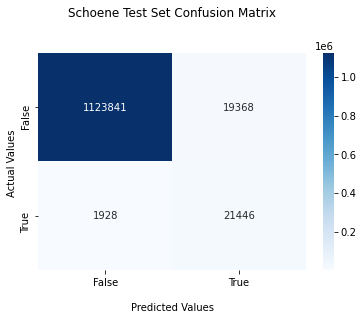

In [208]:
#Complete Test Set Matrices
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
cf_matrix = confusion_matrix(test_labels,test_y)

labels = ['True Neg','False Pos','False Neg','True Pos']

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=cf_matrix, fmt='', cmap='Blues')

ax.set_title('Schoene Test Set Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [209]:
import sklearn
recall = sklearn.metrics.recall_score(test_labels,test_y)
precision = sklearn.metrics.precision_score(test_labels,test_y)
f1 =  sklearn.metrics.f1_score(test_labels,test_y)
print("Recal: ", recall," Precision: ",precision," F1 Score: ",f1)

Recal:  0.9175151878155215  Precision:  0.5254569510462096  F1 Score:  0.6682245902660933


In [44]:
len(test_labels)

1625817

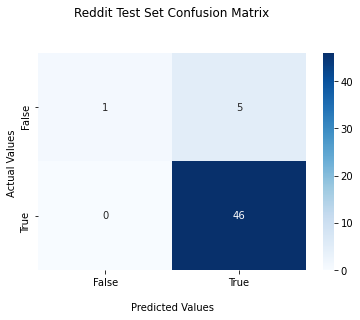

In [140]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
cf_matrix = confusion_matrix(reddit_test_labels,reddit_y)

labels = ['True Neg','False Pos','False Neg','True Pos']

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=cf_matrix, fmt='', cmap='Blues')

ax.set_title('Reddit Test Set Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [141]:
import sklearn
recall = sklearn.metrics.recall_score(reddit_test_labels,reddit_y)
precision = sklearn.metrics.precision_score(reddit_test_labels,reddit_y)
f1 =  sklearn.metrics.f1_score(reddit_test_labels,reddit_y)
print("Recal: ", recall," Precision: ",precision," F1 Score: ",f1)

Recal:  1.0  Precision:  0.9019607843137255  F1 Score:  0.9484536082474228


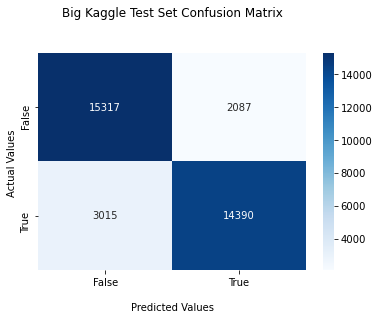

In [142]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
cf_matrix = confusion_matrix(big_test_labels,big_y)

labels = ['True Neg','False Pos','False Neg','True Pos']

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=cf_matrix, fmt='', cmap='Blues')

ax.set_title('Big Kaggle Test Set Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [143]:
import sklearn
recall = sklearn.metrics.recall_score(big_test_labels,big_y)
precision = sklearn.metrics.precision_score(big_test_labels,big_y)
f1 =  sklearn.metrics.f1_score(big_test_labels,big_y)
print("Recal: ", recall," Precision: ",precision," F1 Score: ",f1)

Recal:  0.826773915541511  Precision:  0.873338593190508  F1 Score:  0.8494185703323299


In [144]:
#LOAD THE LIWC RESULT
sent140_neu =pd.read_csv(r"D:\Masaüstü\suicide-detection-project\all_data\sent140_data\sent140_neutral-LIWC Analysis.csv")

In [145]:
sent140_test_labels = sent140_neu["class"]
sent140_neu_test_set = sent140_neu[selected_features]
#sent140_neu_test = (sent140_neu_test-means_selected_data)/stds_selected_data

In [146]:
sen140pred = lgbm_model.predict(sent140_neu_test_set)

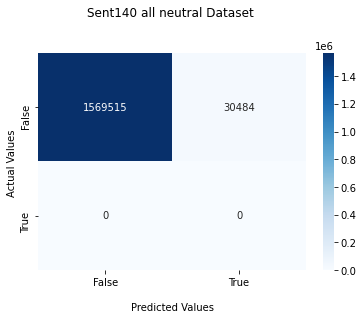

In [147]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
cf_matrix = confusion_matrix(sent140_test_labels,sen140pred)

labels = ['True Neg','False Pos','False Neg','True Pos']

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=cf_matrix, fmt='', cmap='Blues')

ax.set_title('Sent140 all neutral Dataset \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

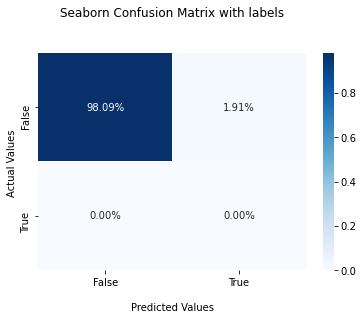

In [148]:
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [150]:
#Complete test dataset
test_set_all = np.concatenate((big_test_set,reddit_test_set,schoene_test_set,sent140_neu_test_set))
test_set_labels_all = np.concatenate((big_test_labels,reddit_test_labels,schoene_test_labels,sent140_test_labels))

all_test_y = lgbm_model.predict(test_set_all)


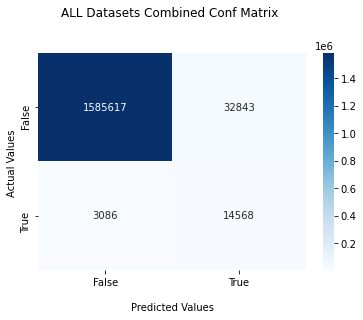

In [151]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
cf_matrix = confusion_matrix(test_set_labels_all,all_test_y)

labels = ['True Neg','False Pos','False Neg','True Pos']

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=cf_matrix, fmt='', cmap='Blues')

ax.set_title('ALL Datasets Combined Conf Matrix \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

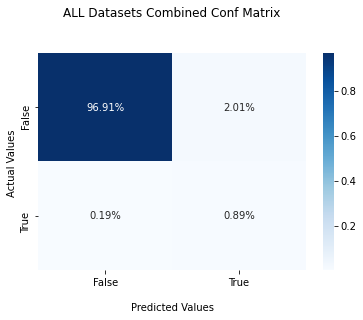

In [152]:
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('ALL Datasets Combined Conf Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [155]:
import sklearn
recall = sklearn.metrics.recall_score(test_set_labels_all,all_test_y)
precision = sklearn.metrics.precision_score(test_set_labels_all,all_test_y)
f1 =  sklearn.metrics.f1_score(test_set_labels_all,all_test_y)
acc = accuracy_score(test_set_labels_all,all_test_y)
print("Recal: ", recall," Precision: ",precision," F1 Score: ",f1,"Accuracy Score: ",acc)

Recal:  0.8251954231335674  Precision:  0.3072704646601  F1 Score:  0.4477983554906632 Accuracy Score:  0.9780400387748042


In [ ]:
#TESTING KAGGLE (SHANON) DATASET
test_kaggle = pd.read_csv("kaggle_test_LIWC.csv")

In [ ]:
selected_data = pd.DataFrame()
#selected_features = ["Clout","Tone","Linguistic","death","WC","Cognition","WPS","focuspast","focusfuture","ppron","Affect","money"]
for i in selected_features:
    selected_data[i] = test_kaggle[i]
kaggle_test = selected_data
kaggle_label = test_kaggle["cls"]

In [ ]:
kaggle_test = (kaggle_test-means_selected_data)/stds_selected_data

In [ ]:
y_pred_kaggle = lgbm_model.predict(kaggle_test)

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(kaggle_label, y_pred_kaggle)
# Print out the mean absolute error (mae)
print("Accuracy: ",acc)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(kaggle_label,y_pred_kaggle)

In [ ]:
#TESTING reddıt (LIFE) DATASET
test_reddit = pd.read_csv("reddit_corpus_agree_LIWC.csv")

In [ ]:
selected_data = pd.DataFrame()
selected_features = ["Clout","Tone","Linguistic","death","WC","Cognition","WPS","focuspast","focusfuture","ppron","Affect","money"]
for i in selected_features:
    selected_data[i] = test_reddit[i]
reddit_test = selected_data
test_reddit["cls"][test_reddit["cls"] =="No risk"]=0 
test_reddit["cls"][test_reddit["cls"] =="Risk"]=1
reddit_test_label = test_reddit["cls"].astype("int")


In [ ]:
reddit_test = (reddit_test-means_selected_data)/stds_selected_data

In [ ]:
reddit_test_label.values

In [ ]:
y_pred_reddit = lgbm_model.predict(reddit_test)

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(reddit_test_label.values, y_pred_reddit)
# Print out the mean absolute error (mae)
print("Accuracy: ",acc)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(reddit_test_label.values,y_pred_reddit)

**Large Neutral Dataset Oluşturma Kısmı (Imbalanced Classification)**

In [126]:
neutral_data = pd.read_csv("training.1600000.processed.noemoticon.csv")
neutral_data.columns = ["Polarity","Id","Date","Query","User","text"]
# the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)

FileNotFoundError: [Errno 2] No such file or directory: 'training.1600000.processed.noemoticon.csv'

In [ ]:
neutral_data.head()
len(neutral_data)

In [ ]:
zero_col = np.zeros(len(neutral_data))
neutral_data["class"] = zero_col

In [122]:
#Sentiment140 Neural Post Data
neutral_sent140 = neutral_data[["text","class"]]
# Save and run the LIWC
neutral_sent140.to_csv("sent140_neutral.csv")

In [128]:
#LOAD THE LIWC RESULT
sent140_neu =pd.read_csv(r"D:\Masaüstü\suicide-detection-project\all_data\sent140_data\sent140_neutral-LIWC Analysis.csv")

In [129]:
sent140_labels = sent140_neu["class"]
sent140_neu_test = sent140_neu[selected_features]
#sent140_neu_test = (sent140_neu_test-means_selected_data)/stds_selected_data

In [130]:
sen140pred = lgbm_model.predict(sent140_neu_test)

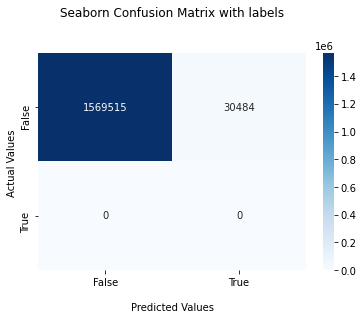

In [131]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
cf_matrix = confusion_matrix(sent140_labels.values,sen140pred)

labels = ['True Neg','False Pos','False Neg','True Pos']

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=cf_matrix, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

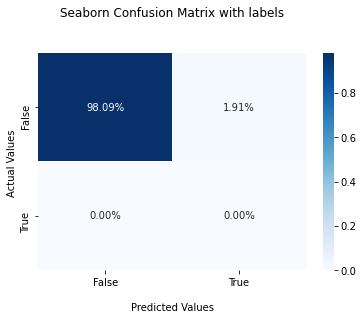

In [132]:
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
#Schoene Test
schoene_neu = pd.read_csv("NEU-LIWC Analysis.csv")
schoene_neu.head()
schoene_neu.drop(columns=["labels"],inplace= True)
schoene_neu["class"] = np.zeros(len(schoene_neu))

In [ ]:
schoene_neu_labels = schoene_neu["class"]
schoene_neu_test = schoene_neu[selected_features]
schoene_neu_test = (schoene_neu_test-means_selected_data)/stds_selected_data

In [ ]:
schoene_neu_pred = lgbm_model.predict(schoene_neu_test)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
cf_matrix = confusion_matrix(schoene_neu_labels.values,schoene_neu_pred)

labels = ['True Neg','False Pos','False Neg','True Pos']

labels = np.asarray(cf_matrix).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
schoene_all_test = np.append(kaggle_test,schoene_neu_test,axis=0)
schoene_all_labels = np.append(kaggle_label,schoene_neu_labels,axis=0)

In [ ]:
schoene_all_pred = lgbm_model.predict(schoene_all_test)

In [ ]:
len(schoene_all_labels)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
cf_matrix = confusion_matrix(schoene_all_labels,schoene_all_pred)

labels = ['True Neg','False Pos','False Neg','True Pos']

labels = np.asarray(cf_matrix).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
import sklearn
recall = sklearn.metrics.recall_score(schoene_all_labels,schoene_all_pred)
precision = sklearn.metrics.precision_score(schoene_all_labels,schoene_all_pred)
f1 =  sklearn.metrics.f1_score(schoene_all_labels,schoene_all_pred)
print("Recal: ", recall," Precision: ",precision," F1 Score: ",f1)

**Asdnin Ayırdığı Data için Yazılmış Kısım (aynı)**

In [ ]:
data = torch.load('processed_dataset_sf.pt')
train_inputs = data['train_inputs']
train_masks = data['train_masks']
train_labels = data['train_labels']
side_features_train = data['side_features_train']
val_inputs = data['val_inputs']
val_masks = data['val_masks']
val_labels = data['val_labels']
side_features_val = data['side_features_val']

In [ ]:
side_features_train.shape

In [ ]:
import matplotlib.pyplot as plt

import lightgbm

from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier(max_depth=3,n_estimators=1000,num_leaves=100,colsample_bynode= 0.6,colsample_bytree= 0.64079,learning_rate=0.01)

lgbm_model.fit(side_features_train, train_labels)

y_pred = lgbm_model.predict(side_features_val)

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(val_labels, y_pred)
# Print out the mean absolute error (mae)
print("Accuracy: ",acc)